# Introduction to summary statistics: The sample mean and median


>> An outlier can significantly affect the value of the mean, but not the median.


In [1]:
import numpy as np

In [2]:
versicolor_petal_length = np.array([ 4.7,  4.5,  4.9,  4. ,  4.6,  4.5,  4.7,  3.3,  4.6,  3.9,  3.5,
        4.2,  4. ,  4.7,  3.6,  4.4,  4.5,  4.1,  4.5,  3.9,  4.8,  4. ,
        4.9,  4.7,  4.3,  4.4,  4.8,  5. ,  4.5,  3.5,  3.8,  3.7,  3.9,
        5.1,  4.5,  4.5,  4.7,  4.4,  4.1,  4. ,  4.4,  4.6,  4. ,  3.3,
        4.2,  4.2,  4.2,  4.3,  3. ,  4.1])


### Computing means


In [3]:
# Compute the mean
mean_length_vers = np.mean(versicolor_petal_length)

# Print the results with some nice formatting
print('I. versicolor:', mean_length_vers, 'cm')

I. versicolor: 4.26 cm


##  Percentiles, outliers, and box plots


### Percentiles

In [4]:
# Specify array of percentiles: percentiles
percentiles = np.array([2.5, 25, 50, 75, 97.5])

# Compute percentiles: ptiles_vers
ptiles_vers = np.percentile(versicolor_petal_length, percentiles)

# Print the result
print(ptiles_vers)

[ 3.3     4.      4.35    4.6     4.9775]


In [9]:
# Specify array of percentiles: percentiles
percentiles1 = np.array([ 25, 50, 75, 100])

# Compute percentiles: ptiles_vers
ptiles_vers = np.percentile(versicolor_petal_length, percentiles1)

# Print the result
print(ptiles_vers)

[ 4.    4.35  4.6   5.1 ]


### Comparing percentiles to ECDF


In [7]:
x_vers = np.array([ 3. ,  3.3,  3.3,  3.5,  3.5,  3.6,  3.7,  3.8,  3.9,  3.9,  3.9,
        4. ,  4. ,  4. ,  4. ,  4. ,  4.1,  4.1,  4.1,  4.2,  4.2,  4.2,
        4.2,  4.3,  4.3,  4.4,  4.4,  4.4,  4.4,  4.5,  4.5,  4.5,  4.5,
        4.5,  4.5,  4.5,  4.6,  4.6,  4.6,  4.7,  4.7,  4.7,  4.7,  4.7,
        4.8,  4.8,  4.9,  4.9,  5. ,  5.1])

In [8]:
y_vers = np.array([ 0.02,  0.04,  0.06,  0.08,  0.1 ,  0.12,  0.14,  0.16,  0.18,
        0.2 ,  0.22,  0.24,  0.26,  0.28,  0.3 ,  0.32,  0.34,  0.36,
        0.38,  0.4 ,  0.42,  0.44,  0.46,  0.48,  0.5 ,  0.52,  0.54,
        0.56,  0.58,  0.6 ,  0.62,  0.64,  0.66,  0.68,  0.7 ,  0.72,
        0.74,  0.76,  0.78,  0.8 ,  0.82,  0.84,  0.86,  0.88,  0.9 ,
        0.92,  0.94,  0.96,  0.98,  1.  ])


In [11]:
import pandas as pd
import matplotlib.pyplot as plt

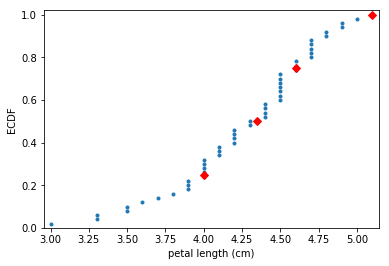

In [12]:
# Plot the ECDF
_ = plt.plot(x_vers, y_vers, '.')
plt.margins(0.02)
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Overlay percentiles as red x's
_ = plt.plot(ptiles_vers, percentiles/100, marker='D', color='red',
         linestyle='none')

# Show the plot
plt.show()


### Box-and-whisker plot


In [13]:
df = pd.read_csv("iris.csv")
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
import seaborn as sns

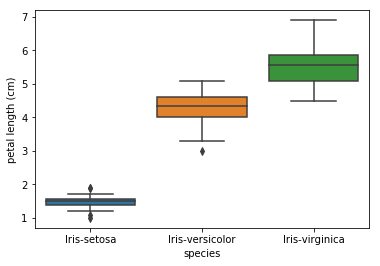

In [15]:
# Create box plot with Seaborn's default settings
_ = sns.boxplot(x='species', y='petal length (cm)', data=df)

# Label the axes
_ = plt.xlabel('species')
_ = plt.ylabel('petal length (cm)')

# Show the plot
plt.show()


# Variance and standard deviation


### Computing the variance


In [16]:
# Array of differences to mean: differences
differences = versicolor_petal_length - np.mean(versicolor_petal_length)

# Square the differences: diff_sq
diff_sq = differences**2

# Compute the mean square difference: variance_explicit
variance_explicit = np.mean(diff_sq)

# Compute the variance using NumPy: variance_np
variance_np = np.var(versicolor_petal_length)

# Print the results
print(variance_explicit, variance_np)


0.2164 0.2164


### The standard deviation and the variance


In [18]:
# Compute the variance: variance
variance = np.var(versicolor_petal_length)

# Print the square root of the variance
print(np.sqrt(variance))

# Print the standard deviation
print(np.std(versicolor_petal_length))


0.465188133985
0.465188133985


# Covariance and Pearson correlation coefficient


 ### Scatter plots


In [20]:
versicolor_petal_width = np.array([ 1.4,  1.5,  1.5,  1.3,  1.5,  1.3,  1.6,  1. ,  1.3,  1.4,  1. ,
        1.5,  1. ,  1.4,  1.3,  1.4,  1.5,  1. ,  1.5,  1.1,  1.8,  1.3,
        1.5,  1.2,  1.3,  1.4,  1.4,  1.7,  1.5,  1. ,  1.1,  1. ,  1.2,
        1.6,  1.5,  1.6,  1.5,  1.3,  1.3,  1.3,  1.2,  1.4,  1.2,  1. ,
        1.3,  1.2,  1.3,  1.3,  1.1,  1.3])


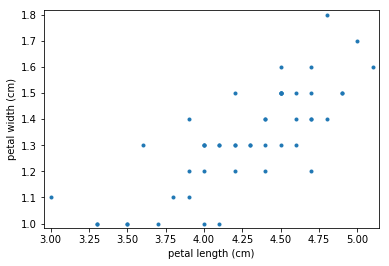

In [21]:
# Make a scatter plot
_ = plt.plot(versicolor_petal_length, versicolor_petal_width,
             marker='.', linestyle='none')

# Set margins
plt.margins(0.02)

# Label the axes
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('petal width (cm)')

# Show the result
plt.show()


### Computing the covariance


In [22]:
# Compute the covariance matrix: covariance_matrix
covariance_matrix = np.cov(versicolor_petal_length, versicolor_petal_width)

# Print covariance matrix
print(covariance_matrix)

# Extract covariance of length and width of petals: petal_cov
petal_cov = covariance_matrix[0,1]

# Print the length/width covariance
print(petal_cov)


[[ 0.22081633  0.07310204]
 [ 0.07310204  0.03910612]]
0.0731020408163


### Computing the Pearson correlation coefficient


In [23]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient for I. versicolor
r = pearson_r(versicolor_petal_width, versicolor_petal_length)

# Print the result
print(r)


0.786668088523
